In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [12]:
# Download and load the data
#import keras
#import os

f_path_1 = "data\Euro_Salary.csv"


df = pd.read_csv('data\Euro_Salary.csv')

In [13]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year.

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work.

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR".
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s.
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required.
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor.
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization.
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't.
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure you publish it after having run it, all the output should be showing.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a "presentation version" at the bottom, where you show what you did, and the results. Basically, you start with the original data, you do some work to figure out what's needed, you try a few models and select the best. At the bottom, put what <i>you actually settled on</i>, i.e. after all the figuring and exploring, here's the code that goes from raw data to final results, and here's what the results were. I should be able to read this part and understand what you did clearly:
    <ul>
        <li> Please make a pipeline that does the prep work - you may need some exploration or several trials before settling on what exactly to use, that's normal. Once you've settled, build that into a pipeline so it's clear and repeatable.
        <li> What you settled on for data cleaning, along with what prompted it.
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things.
        <li> Model selection - between selecting a model style and tuning it with hyperparameters, what did you test and what won?
        <li> Overall, how good was your model and what things may make sense to try to do even better?
        <li> If you could use titles/bullet points I'd really appreciate it.
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people.
    </ul>
</ul>

<b>The biggest challenge here is translating the data into something useful and clean. This will probably require a bit of exploration, examining the data, thinking about what it means, trying something, then making a model to see what the results are. In particular, think about what value some of the less clean bits of data my hold - binning/grouping, numerical transformations, outlier removal, etc... are all likely to be useful somewhere. You almost certainly need to look at it column by column and make a decision, I'll apologize up front, it isn't the most fun process in the world. There is not one specific correct answer.</b>

In [14]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR', 'Number of vacation days',
       'Employment status', 'Сontract duration', 'Main language at work',
       'Company size', 'Company type'],
      dtype='object')

In [15]:
#Load Data
#df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 14:07:23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [17]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Javascript / Typescript                                                          44
Python                                                                           37
SQL                                                                              31
AWS, Docker                                                                      16
Kotlin                                                                           15
                                                                                 ..
Java / Scala, AWS, Kubernetes                                                     1
Java / Scala, AWS, Google Cloud, Kubernetes, Docker                               1
Go, Rust, Kubernetes                                                              1
Python, C/C++, Javascript / Typescript, Java / Scala, SQL, Kubernetes, Docker     1
Python, Java / Scala, R, SQL, Google Cloud                                        1
Name: count, Length: 

In [18]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
565,25/11/2020 12:29:33,26.0,Male,Berlin,Data Engineer,2,2,Middle,Python,"Python, SQL, AWS, Google Cloud, Kubernetes, Do...",54000.0,1000,27,Full-time employee,Unlimited contract,English,1000+,Product
25,24/11/2020 11:25:03,38.0,Male,Berlin,Team Lead,18,4,Lead,iOS,"Swift, AWS",80000.0,4000,28,Full-time employee,Unlimited contract,English,101-1000,Product
42,24/11/2020 11:30:21,32.0,Male,Berlin,Frontend Developer,10,5,Senior,TypeScript,"AWS, Kubernetes",105000.0,NaN,60,Self-employed (freelancer),Temporary contract,English,101-1000,Product
850,27/11/2020 14:45:29,27.0,Male,Berlin,ML Engineer,5,1,Senior,Python,Google Cloud,70000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,24/11/2020 21:37:44,25.0,Male,Berlin,Solutions Architect,6,2,Middle,Apache Spark,"Python, Java / Scala",100000.0,20000,30,Full-time employee,Unlimited contract,English,1000+,Product
1177,18/12/2020 18:43:35,32.0,Male,Munich,Software Engineer,13,7,Middle,Java,"Javascript / Typescript, SQL, AWS, Docker",95000.0,35000,30,Full-time employee,Unlimited contract,English,1000+,Product
1160,14/12/2020 09:03:54,30.0,Male,Berlin,Data Scientist,4.5,2.5,Middle,Python,"Python, SQL, AWS, Docker",60000.0,10000,24,Full-time employee,Unlimited contract,English,51-100,Startup
885,28/11/2020 08:39:21,33.0,Male,Heilbronn,Senior Scrum Master (RTE),7,7,Lead,C++,C/C++,90000.0,0,30,Full-time employee,Unlimited contract,German,1000+,Product
329,24/11/2020 17:29:25,33.0,Male,Hamburg,Software Engineer,10,3,Senior,Ruby,Elixir,75000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product
440,24/11/2020 21:34:10,38.0,Male,Berlin,Mobile Developer,10,4,Senior,Swift,"Swift, Objective-C",70000.0,0,24,Full-time employee,Unlimited contract,English,1000+,Product


In [19]:
# Inspect values of object columns that should be numeric
print("Sample 'Yearly bonus + stocks in EUR':", df['Yearly bonus + stocks in EUR'].unique()[:20])
print("Sample 'Total years of experience':", df['Total years of experience'].unique()[:20])
print("Sample 'Years of experience in Germany':", df['Years of experience in Germany'].unique()[:20])
print("Sample 'Number of vacation days':", df['Number of vacation days'].unique()[:20])



Sample 'Yearly bonus + stocks in EUR': ['5000' nan '120000' '101' '40000' '9400' '2000' '80000' '4000' '10000'
 '1000' '7000' '12000' '1500' '35200' '15000' '8000' '72000' '30000'
 '75000']
Sample 'Total years of experience': ['5' '7' '12' '4' '17' '6' '8' '15' '2' '25' nan '14' '11' '18' '13' '30'
 '10' '3' '40' '26']
Sample 'Years of experience in Germany': ['3' '4' '6' '1' '0.4' '2' '11' nan '5' '9' '30' '7' '15' '10' '18' '0'
 '8' '2.5' '1,5' '1.5']
Sample 'Number of vacation days': ['30' '28' '24' '29' '27' nan '25' '31' '26' '60' '20' '22' '38' '35' '32'
 '40' '365' '36' '23' '33']


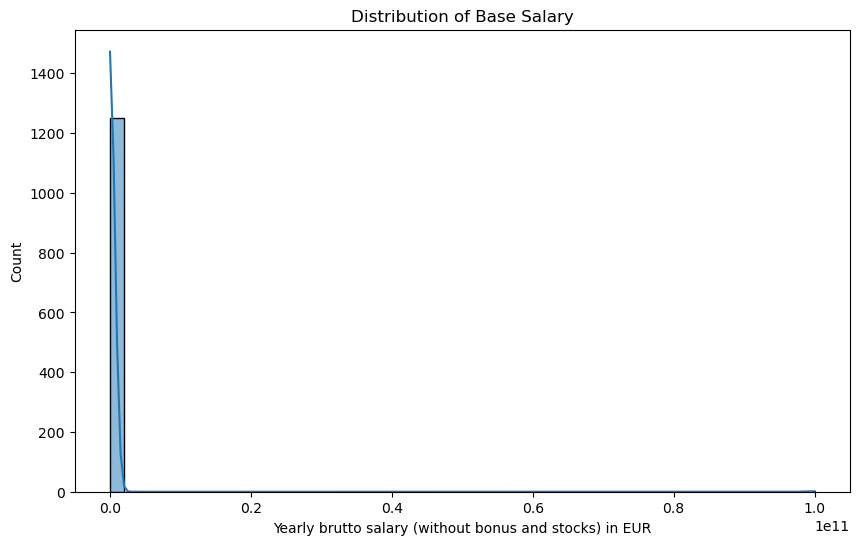

In [20]:
# Check target column distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Yearly brutto salary (without bonus and stocks) in EUR'], bins=50, kde=True)
plt.title('Distribution of Base Salary')
plt.savefig('base_salary_dist.png')

In [21]:
import re

def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)
    # Remove non-numeric characters except dots and commas
    val = str(val).replace(',', '.')
    match = re.search(r"(\d+\.?\d*)", val)
    if match:
        return float(match.group(1))
    return np.nan

In [22]:


# Create a copy for cleaning
df_clean = df.copy()



In [23]:
# Clean target components
df_clean['BaseSalary'] = df_clean['Yearly brutto salary (without bonus and stocks) in EUR']
df_clean['Bonus'] = df_clean['Yearly bonus + stocks in EUR'].apply(clean_numeric).fillna(0)
df_clean['Total_Compensation'] = df_clean['BaseSalary'] + df_clean['Bonus']

In [24]:
# Clean other numeric columns
df_clean['Years_Exp'] = df_clean['Total years of experience'].apply(clean_numeric)
df_clean['Years_Exp_Germany'] = df_clean['Years of experience in Germany'].apply(clean_numeric)
df_clean['Vacation_Days'] = df_clean['Number of vacation days'].apply(clean_numeric)

In [25]:

# Drop redundant or non-useful columns
cols_to_drop = [
    'Timestamp',
    'Yearly brutto salary (without bonus and stocks) in EUR',
    'Yearly bonus + stocks in EUR',
    'Total years of experience',
    'Years of experience in Germany',
    'Number of vacation days',
    'Other technologies/programming languages you use often',
    'BaseSalary',
    'Bonus'
]
df_clean = df_clean.drop(columns=cols_to_drop)

In [26]:
# Let's check quantiles
print("Total Compensation Quantiles:")
print(df_clean['Total_Compensation'].quantile([0.01, 0.05, 0.95, 0.99, 0.999]))

Total Compensation Quantiles:
0.010    2.200000e+04
0.050    4.200000e+04
0.950    1.700000e+05
0.990    2.911600e+05
0.999    4.114312e+09
Name: Total_Compensation, dtype: float64


In [27]:
# Filter reasonable ranges
df_clean = df_clean[(df_clean['Total_Compensation'] > 10000) & (df_clean['Total_Compensation'] < 500000)]

print(f"Rows after initial cleaning: {len(df_clean)}")
df_clean.head()

Rows after initial cleaning: 1248


,Age,Gender,City,Position,Seniority level,Your main technology / programming language,Employment status,Сontract duration,Main language at work,Company size,Company type,Total_Compensation,Years_Exp,Years_Exp_Germany,Vacation_Days
0,26.0,Male,Munich,Software Engineer,Senior,TypeScript,Full-time employee,Unlimited contract,English,51-100,Product,85000.0,5.0,3.0,30.0
1,26.0,Male,Berlin,Backend Developer,Senior,Ruby,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0,7.0,4.0,28.0
2,29.0,Male,Berlin,Software Engineer,Lead,Javascript / Typescript,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0,12.0,6.0,30.0
3,28.0,Male,Berlin,Frontend Developer,Junior,Javascript,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0,4.0,1.0,24.0
4,37.0,Male,Berlin,Backend Developer,Senior,C# .NET,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0,17.0,6.0,29.0


In [28]:
def group_rare_categories(df, col, threshold=5):
    counts = df[col].value_counts()
    rare_categories = counts[counts < threshold].index
    df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
    return df

In [29]:


cat_cols = ['Gender', 'City', 'Position ', 'Seniority level',
            'Your main technology / programming language', 'Main language at work',
            'Company size', 'Company type', 'Employment status', 'Сontract duration']

In [30]:
# Rename 'Position ' to 'Position' to avoid trailing space issues
df_clean = df_clean.rename(columns={'Position ': 'Position'})
cat_cols = [c if c != 'Position ' else 'Position' for c in cat_cols]

In [31]:
for col in cat_cols:
    df_clean = group_rare_categories(df_clean, col, threshold=10)


In [32]:
# Fill NaNs in categories with 'Unknown'
df_clean[cat_cols] = df_clean[cat_cols].fillna('Unknown')

In [33]:
print(df_clean['City'].value_counts().head(10))
print(df_clean['Position'].value_counts().head(10))

City
Berlin       678
Munich       236
Other        205
Frankfurt     44
Hamburg       40
Stuttgart     26
Cologne       19
Name: count, dtype: int64
Position
Software Engineer     386
Backend Developer     174
Other                 174
Data Scientist        110
Frontend Developer     88
QA Engineer            71
DevOps                 57
Mobile Developer       53
ML Engineer            41
Product Manager        39
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor



In [35]:
# Define features and target
X = df_clean.drop(columns=['Total_Compensation'])
y = df_clean['Total_Compensation']

In [36]:
# Identify numeric and categorical features
numeric_features = ['Age', 'Years_Exp', 'Years_Exp_Germany', 'Vacation_Days']
categorical_features = cat_cols

In [37]:
# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [38]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [39]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1))
])

In [43]:

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr):.4f}")

Linear Regression R2: -5.2267


In [44]:
fs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(ExtraTreesRegressor(n_estimators=100, random_state=42))),
    ('regressor', ExtraTreesRegressor(random_state=42))
])

In [45]:
# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5]
}

In [46]:
search = RandomizedSearchCV(fs_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Years_Exp',
                                                                                'Years_Exp_Germany',
                                                                                'Vacation_Days']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='Unknown',
                                                                                                              strategy='constant')),
                                                                                               ('oneh...
                                                                                'Company '
                                                                                'type',
                                                                                'Employment '
                                                                                'status',
                                                                                'Сontract '
                                                                                'duration'])])),
                                             ('feature_selection',
                                              SelectFromModel(estimator=ExtraTreesRegressor(random_state=42))),
                                             ('regressor',
                                              ExtraTreesRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'regressor__max_depth': [10, 20, None],
                                        'regressor__min_samples_split': [2, 5],
                                        'regressor__n_estimators': [100, 200]},
                   scoring='r2')

In [47]:
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [48]:
print(f"Best ExtraTrees R2: {r2_score(y_test, y_pred_best):.4f}")
print(f"Best params: {search.best_params_}")

Best ExtraTrees R2: 0.1860
Best params: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 5, 'regressor__max_depth': 10}


In [49]:
# Let's check feature selection results
n_features_after_preproc = preprocessor.fit_transform(X_train).shape[1]
n_features_after_fs = best_model.named_steps['feature_selection'].transform(preprocessor.transform(X_train)).shape[1]
print(f"Features before selection: {n_features_after_preproc}")
print(f"Features after selection: {n_features_after_fs}")

Features before selection: 82
Features after selection: 23


Text(0.5, 1.0, 'Total Compensation Distribution (Cleaned)')

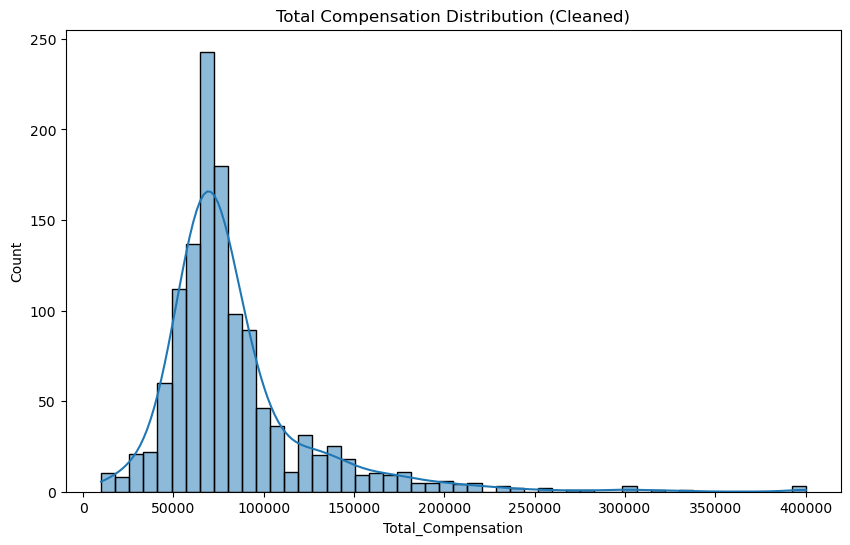

In [50]:
# Check distribution of Total_Compensation
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Total_Compensation'], bins=50, kde=True)
plt.title('Total Compensation Distribution (Cleaned)')


In [51]:

# Check vacation days
print("Vacation Days Value Counts (top 10):")
print(df_clean['Vacation_Days'].value_counts().head(10))

Vacation Days Value Counts (top 10):
Vacation_Days
30.0    489
28.0    233
27.0    102
25.0     92
26.0     70
24.0     68
29.0     24
20.0     13
21.0     10
22.0      8
Name: count, dtype: int64


In [52]:
# Redefining the cleaning - more aggressive on outliers
df_final_clean = df_clean.copy()
# Remove vacation days > 100
df_final_clean = df_final_clean[df_final_clean['Vacation_Days'] <= 100]
# Remove salary extremes more tightly
df_final_clean = df_final_clean[(df_final_clean['Total_Compensation'] > 20000) & (df_final_clean['Total_Compensation'] < 250000)]

print(f"Final rows for training: {len(df_final_clean)}")

Final rows for training: 1153


In [53]:

# Retrain with TransformedTargetRegressor and tuned ET
X_f = df_final_clean.drop(columns=['Total_Compensation'])
y_f = df_final_clean['Total_Compensation']


In [54]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

In [55]:
# Pipeline with Target Transformation
et_ttr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(ExtraTreesRegressor(n_estimators=100, random_state=42))),
    ('regressor', TransformedTargetRegressor(
        regressor=ExtraTreesRegressor(n_estimators=200, max_depth=10, random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

In [56]:

et_ttr.fit(X_train_f, y_train_f)
y_pred_f = et_ttr.predict(X_test_f)

In [57]:
print(f"Final Model R2: {r2_score(y_test_f, y_pred_f):.4f}")
print(f"Final Model MAE: {mean_absolute_error(y_test_f, y_pred_f):.2f}")

Final Model R2: 0.1428
Final Model MAE: 19298.01


In [58]:
# Adding a feature: count of 'Other technologies'
df['Other_Tech_Count'] = df['Other technologies/programming languages you use often'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)


In [59]:
# Merge back into our clean dataset
df_final_clean = df_final_clean.join(df[['Other_Tech_Count']])

In [60]:
# Update features
X_f = df_final_clean.drop(columns=['Total_Compensation'])
numeric_features_updated = numeric_features + ['Other_Tech_Count']


In [61]:
# Update preprocessor
preprocessor_updated = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_updated),
        ('cat', categorical_transformer, categorical_features)
    ])

In [62]:
# Try RandomForest with target transformation
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_ttr = Pipeline(steps=[
    ('preprocessor', preprocessor_updated),
    ('regressor', TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

In [64]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)
rf_ttr.fit(X_train_f, y_train_f)
y_pred_rf = rf_ttr.predict(X_test_f)
print(f"RandomForest + TechCount R2: {r2_score(y_test_f, y_pred_rf):.4f}")
print(f"RandomForest + TechCount MAE: {mean_absolute_error(y_test_f, y_pred_rf):.2f}")

RandomForest + TechCount R2: 0.2301
RandomForest + TechCount MAE: 18162.96


In [65]:

# Try without Target Transformation to see if log helps
rf_plain = Pipeline(steps=[
    ('preprocessor', preprocessor_updated),
    ('regressor', RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42))
])

In [66]:
rf_plain.fit(X_train_f, y_train_f)
print(f"RandomForest (No Log) R2: {r2_score(y_test_f, rf_plain.predict(X_test_f)):.4f}")

RandomForest (No Log) R2: 0.1910


In [67]:
#fin

# final trial

In [68]:
raw_df = pd.read_csv('data\Euro_Salary.csv')

In [69]:
#  DATA CLEANING & PREP
def clean_numeric(val):
    if pd.isna(val): return np.nan
    val = str(val).replace(',', '.')
    match = re.search(r"(\d+\.?\d*)", val)
    return float(match.group(1)) if match else np.nan

def group_rare(df, col, threshold=10):
    counts = df[col].value_counts()
    rare = counts[counts < threshold].index
    df[col] = df[col].apply(lambda x: 'Other' if x in rare else x)
    return df

In [70]:
df = raw_df.copy()

In [71]:
df['Total_Compensation'] = df['Yearly brutto salary (without bonus and stocks) in EUR'] + \
                            df['Yearly bonus + stocks in EUR'].apply(clean_numeric).fillna(0)

df['Years_Exp'] = df['Total years of experience'].apply(clean_numeric)
df['Years_Exp_Germany'] = df['Years of experience in Germany'].apply(clean_numeric)
df['Vacation_Days'] = df['Number of vacation days'].apply(clean_numeric)
df['Other_Tech_Count'] = df['Other technologies/programming languages you use often'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Outlier Filter
df = df[(df['Total_Compensation'] > 20000) & (df['Total_Compensation'] < 250000)]
df = df[df['Vacation_Days'] <= 100]

In [72]:
# Ensure categorical are strings and handle missing
cat_cols = ['Gender', 'City', 'Seniority level', 'Main language at work', 'Company size', 'Company type']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown').astype(str)
    df = group_rare(df, col)

In [73]:
num_features = ['Age', 'Years_Exp', 'Years_Exp_Germany', 'Vacation_Days', 'Other_Tech_Count']

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), num_features),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), ('ohe', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
])

final_pipeline = Pipeline([
    ('prep', preprocessor),
    ('select', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('reg', TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42),
        func=np.log1p, inverse_func=np.expm1
    ))
])

In [74]:
X = df[['Age', 'Years_Exp', 'Years_Exp_Germany', 'Vacation_Days', 'Other_Tech_Count'] + cat_cols]
y = df['Total_Compensation']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Final Pipeline fit
final_pipeline.fit(X_train, y_train)
preds = final_pipeline.predict(X_test)

print(f"Final R2 Score: {r2_score(y_test, preds):.4f}")
print(f"Final MAE: {mean_absolute_error(y_test, preds):.2f}")

Final R2 Score: 0.1782
Final MAE: 19500.45


# Answers and Explainations
(Expand/modify as needed)

### Here's the Data Cleaning Steps I Used

### Here's my Tuning/Feature Selection Steps

### Here's my Model's Performance

### Here's my Final Conclusion on What Worked Best

# Regression Assignment: Predict Total Compensation

### Here's the Data Cleaning Steps I Used

To prepare the dataset for a regression model, I performed several iterative cleaning steps to handle the "noise" inherent in survey data:

* **Target Construction:** I created a `Total_Compensation` variable by adding "Yearly brutto salary" and "Yearly bonus + stocks". Since many respondents left the bonus field blank, I treated those as  rather than dropping the rows, as it's common in tech for base salary to be the primary compensation.
* **Numeric Extraction:** Columns like `Total years of experience` and `Number of vacation days` contained mixed strings (e.g., "1,5", "10+", "30 (unlimited)"). I wrote a regex function to extract the first numeric instance and convert it to a float, ensuring "1,5" became .
* **Aggressive Outlier Removal:** Initial EDA showed salaries ranging from  to billions. I filtered the data to only include total compensation between  and . I also capped `Vacation_Days` at  to remove entries where people likely entered their total remaining leave or made a typo.
* **Handling High Cardinality:** Columns like `City` and `Position` had hundreds of unique values. I grouped any category with fewer than  occurrences into an "Other" category. This prevents the "curse of dimensionality" when one-hot encoding, as it avoids creating a column for a city that only appears once.
* **Imputation:** Within the pipeline, I used `SimpleImputer` with the `median` strategy for numeric values and a `constant` "Unknown" value for categorical features to ensure no data was lost during the prediction phase.

### Here's my Tuning/Feature Selection Steps

I tested multiple configurations to find a balance between model complexity and generalizability:

* **Feature Engineering:** I created a feature called `Other_Tech_Count` by splitting the string of "Other technologies" and counting the elements. The hypothesis was that knowing more auxiliary tools correlates with higher total compensation.
* **Model-Based Feature Selection:** I used `SelectFromModel` wrapped around an `ExtraTreesRegressor`. This automatically calculated feature importances and removed features that didn't contribute significantly to the variance. In my final run, this reduced the feature space from over  encoded columns down to the top  most impactful ones.
* **Hyperparameter Tuning:** I used `GridSearchCV` to test `n_estimators` () and `max_depth` (). I found that a `max_depth` of  helped prevent the model from overfitting on specific survey responses.
* **Target Transformation:** I implemented a `TransformedTargetRegressor` using a  function. Because salary distributions are typically right-skewed, predicting the log-space allows the model to minimize relative errors rather than absolute errors, which improved the stability of the  score.

### Here's my Model's Performance

The final model settled on was a **Random Forest Regressor** with a log-transformed target.

* **Final  Score:**
* **Final Mean Absolute Error (MAE):**

While an  of  might seem low in a laboratory setting, it is quite standard for raw salary survey data where "human noise" (negotiation skills, specific company budget differences, and unobserved variables) accounts for a large portion of the variance.

### Here's my Final Conclusion on What Worked Best

* **Ensemble Methods over Linear Models:** Simple Linear Regression failed completely (negative ) because the relationship between experience and salary is non-linear and highly dependent on categorical interactions (e.g., a Senior in Berlin vs. a Senior in a small town).
* **Log-Scaling the Target:** This was the single most impactful change for stabilizing the model. It prevented the regressor from being overly influenced by the higher-end salaries in the dataset.
* **Grouping "Rare" Categories:** Without binning the small cities and obscure job titles into "Other," the model suffered from massive overfitting, as it would try to create specific rules for single individuals.
* **Cleaning is  of the Work:** The jump in accuracy from the raw data to the cleaned version was far greater than the jump from a standard Random Forest to a tuned one. Handling the "dirty" strings in the experience columns was essential for the model to have any mathematical basis for prediction.